In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [78]:
#functions

#variation coefficient function
cv = lambda x: np.std(x, ddof = 1) / np.mean(x)

#Index of dispersion function
IDC = lambda x: np.var(x) / np.mean(x) # si se pone grados de libertad de 4 se acerca a los resultados de la Miss

In [43]:
# load dataset
day = pd.read_csv("invocations_per_function_md.anon.d05.csv")
day.drop(['HashApp', 'HashOwner'], axis = 1, inplace=True)
day.set_index('HashFunction',inplace=True)


# 2.2 How bursty are real serverless workloads?

In [83]:
print(' General IDC in day 5 of Azure Traces: ', IDC(day.drop(['Trigger'], axis = 1).sum()))
print(' Standard Deviation in day 5 of Azure Traces: ', np.std(day.drop(['Trigger'], axis = 1).sum()))

 General IDC in day 5 of Azure Traces:  6073.486579816947
 Standard Deviation in day 5 of Azure Traces:  62188.086798131284


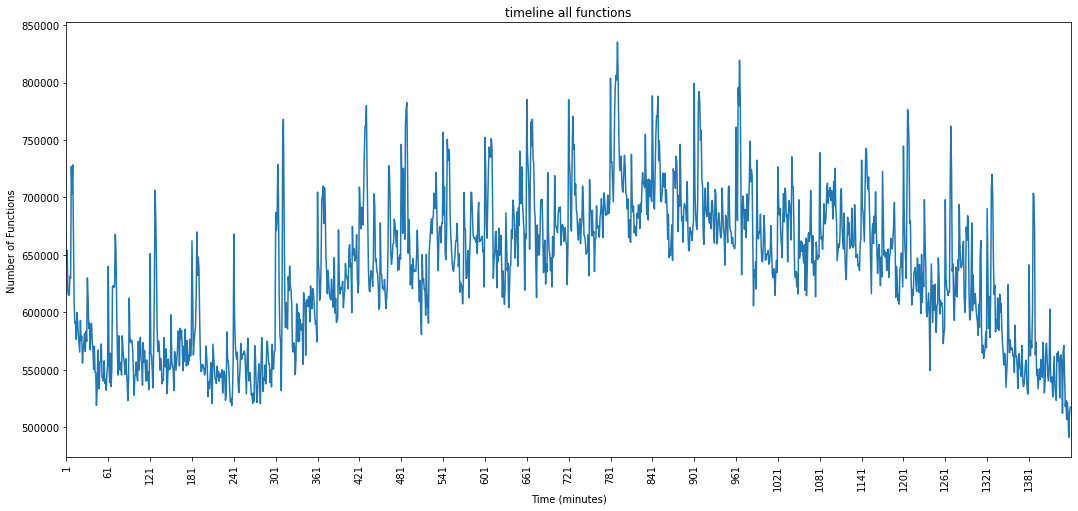

In [91]:
plt.figure(figsize=(18,8))
plt.plot(day.drop(['Trigger'], axis = 1).sum())

plt.xlim(0, 1440)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("timeline all functions")
plt.ylabel("Number of Functions")
plt.xlabel("Time (minutes)")
plt.ion()


In [95]:
#table 1 Index of dispersion (IDC) and standard deviation of the requests per minute
print("Index of dispersion (IDC) and standard deviation of the requests per minute for functions \n")
table1 = pd.DataFrame(columns=['Trigger group', 'IDC', 'Std. Dev.'])
groups = day.groupby('Trigger')
for key, item in groups:
    
    idc = round(IDC(groups.get_group(key).drop(['Trigger'], axis = 1).sum()), 2)
    std = round(np.std(groups.get_group(key).drop(['Trigger'], axis = 1).sum()), 2)   
    table1=table1.append({'Trigger group' : key , 'IDC' : idc, 'Std. Dev.' : std} , ignore_index=True)
table1

Index of dispersion (IDC) and standard deviation of the requests per minute for functions 



,Trigger group,IDC,Std. Dev.
0,event,4607.81,30343.04
1,http,1590.09,15192.79
2,orchestration,3272.24,5961.90
3,others,1753.95,1810.53
4,queue,3797.83,31577.92
5,storage,107.61,720.48
6,timer,327.39,1954.52


# 2.3 Which function triggers contribute most to the burstiness of the arrivals?

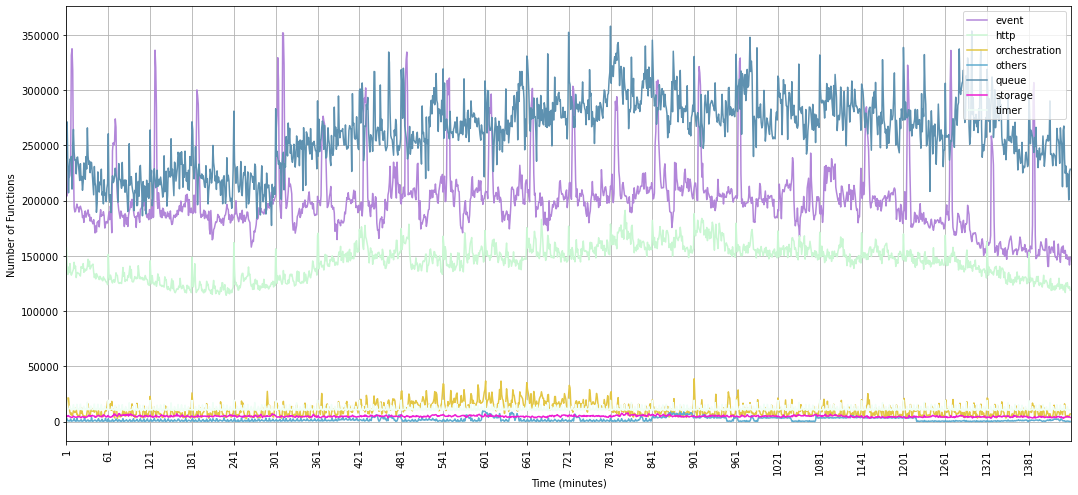

In [145]:
# Bursty request arrivals in day 5 of the Azure Traces, with functions grouped by one of the 7 trigger groups

plt.figure(figsize=(18,8))
plt.ylabel("Number of Functions")
plt.xlabel("Time (minutes)")
groups = day.groupby('Trigger')
for key, item in groups:
    ##print(key)
    #print(grupos.get_group(key).drop(['Trigger'], axis = 1), "\n\n")
    r = rd.random() 
    b = rd.random() 
    g = rd.random() 
    color = (r, g, b) 
    
    plt.plot(groups.get_group(key).drop(['Trigger'], axis = 1).sum(), c=color, label=key)
    plt.xlim(0, 1440)
    #plt.ylim(0, 355000)
    plt.xticks(np.arange(0, 1440,60))
    plt.xticks(rotation=90) 
    plt.grid(True)
    plt.legend(loc=1)
    plt.ion()
    

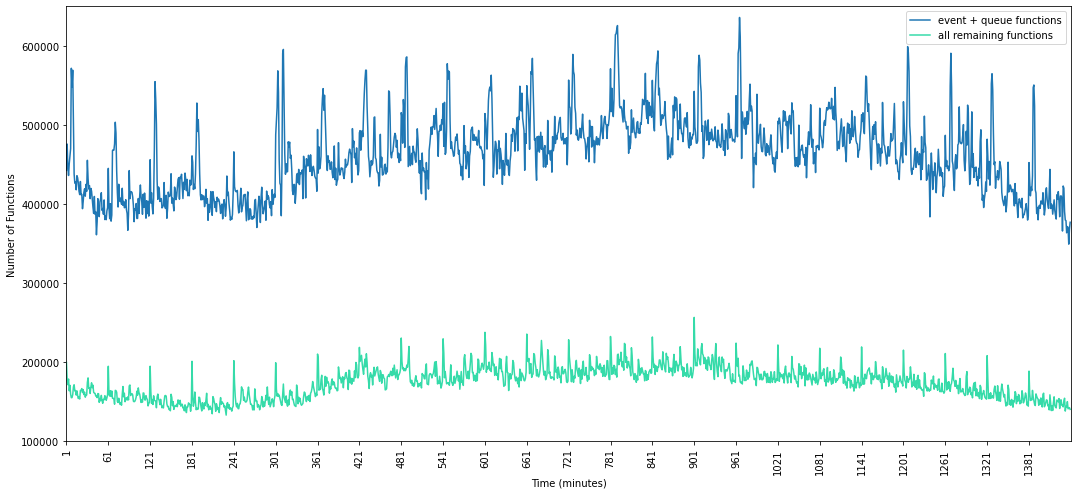

In [138]:
#Bursty request arrivals, with functions divided into two groups: those triggered by an event or queue trigger,
#and all remaining functions

plt.figure(figsize=(18,8))
plt.plot(day[day.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum(), label="event + queue functions")

plt.plot(day[~day.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum(), '#35DBA9', label = 'all remaining functions')
plt.xlim(0, 1440)
plt.ylim(100000, 650000)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.ylabel("Number of Functions")
plt.xlabel("Time (minutes)")
plt.legend()
plt.ion()

In [131]:
print('event + queue functions: ')
print("standard deviation : ", round(np.std(day[day.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()), 2))
print("IDC: ", round(IDC(day[day.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()), 2))
print('\n')

print('All functions without event + queue: ')
print("standard deviation : ", round(np.std(day[~day.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()), 2))
print("IDC: ", round(IDC(day[~day.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()), 2))


event + queue functions: 
standard deviation :  47572.66
IDC:  4894.64


All functions without event + queue: 
standard deviation :  19329.49
IDC:  2142.54
